In [324]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import xlrd
pd.options.display.max_rows = 144
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline


In [325]:
df = pd.read_excel('ForeignGifts.xls',encoding = 'latin-1', header = 1)

In [326]:
df

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,324200,Carnegie Mellon University,Pittsburgh,PA,2015-01-01,77391377,Contract,QATAR,Qatar Foundation for Education
1,2,143400,American University (The),Washington,DC,2012-01-25,500000,Monetary Gift,BAHRAIN,Kingdom of Bahrain
2,3,143400,American University (The),Washington,DC,2013-05-28,500000,Monetary Gift,BAHRAIN,Sheikh Salman Bin Al-Khalifa
3,4,143400,American University (The),Washington,DC,2015-09-10,500000,Monetary Gift,KUWAIT,NaN
4,5,143400,American University (The),Washington,DC,2012-05-17,610000,Monetary Gift,ENGLAND,NaN
5,6,143400,American University (The),Washington,DC,2014-04-24,1000000,Monetary Gift,ENGLAND,Anonymous
6,7,143400,American University (The),Washington,DC,2015-04-13,1000000,Monetary Gift,ENGLAND,NaN
7,8,211500,Amherst College,Amherst,MA,2018-04-05,500000,Monetary Gift,MONACO,Prince Albert II
8,9,108100,Arizona State University,Tempe,AZ,2013-03-22,23,Contract,FRANCE,Center Hospitalier Univers. Vaudois
9,10,108100,Arizona State University,Tempe,AZ,2018-03-28,130,Contract,VIETNAM,"Intel Products Vietnam Co., Ltd."


In [327]:
df.shape

(21052, 10)

In [328]:
df.dtypes

ID                                     int64
OPEID                                  int64
Institution Name                      object
City                                  object
State                                 object
Foreign Gift Received Date    datetime64[ns]
Foreign Gift Amount                    int64
Gift Type                             object
Country of Giftor                     object
Giftor Name                           object
dtype: object

In [329]:
df[df['Gift Type'] == 'Real Estate']

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
359,360,135000,Colorado State University,Fort Collins,CO,2014-09-29,4312000,Real Estate,MEXICO,MIRA
1670,1671,113100,California Institute of Technology,Pasadena,CA,2012-01-03,150,Real Estate,FRANCE,Mr. Jean-Pierre Dolait


In [330]:
df.groupby(by='Institution Name',as_index = False).sum().sort_values(by='Foreign Gift Amount',ascending = False)

,Institution Name,ID,OPEID,Foreign Gift Amount
15,Carnegie Mellon University,685918,52844600,1378003807
35,Harvard University,2244942,121542000,1143899998
50,Massachusetts Institute of Technology,3315753,90387000,660830374
42,Johns Hopkins University,9778790,245293700,447459034
63,Northwestern University,1773051,39997000,420550173
31,Georgetown University,439448,14883500,415622195
92,"University of California, Berkeley",3383831,42246400,336801721
25,Duke University,421232,32412000,314693237
83,Stanford University,7469064,85999500,313775195
62,New York University,1625636,74081000,291391003


In [331]:
df.groupby(by='Country of Giftor', as_index = False).sum().sort_values(by='Foreign Gift Amount',ascending = False)

,Country of Giftor,ID,OPEID,Foreign Gift Amount
106,QATAR,3315093,118552000,1478676069
38,ENGLAND,31589478,552868700,936468499
13,BERMUDA,926520,23718000,812426114
26,CHINA,18092303,315381600,680273016
110,SAUDI ARABIA,6245636,141787300,649971586
53,HONG KONG,10044775,153988300,583104614
22,CANADA,23516436,377770600,511016461
65,JAPAN,20199569,337935500,447932424
56,INDIA,2366358,121098700,428598388
123,SWITZERLAND,14075862,338162400,421080365


In [332]:
df.groupby(by= ['Country of Giftor','Gift Type'],
           as_index = False).sum().sort_values(by='Foreign Gift Amount', ascending = False)

,Country of Giftor,Gift Type,ID,OPEID,Foreign Gift Amount
178,QATAR,Contract,2648866,88956600,1404054808
21,BERMUDA,Contract,554687,14465400,755534237
65,ENGLAND,Monetary Gift,19538295,263532100,544642697
92,HONG KONG,Monetary Gift,9670309,146498900,531604426
185,SAUDI ARABIA,Contract,5064171,114011400,455410417
64,ENGLAND,Contract,12051183,289336600,391825802
43,CHINA,Contract,5868422,125816800,356598240
44,CHINA,Monetary Gift,12223881,189564800,323674776
111,JAPAN,Contract,8392023,173995300,273270229
35,CANADA,Contract,8925421,186960900,256781569


In [373]:
contract = df[df['Gift Type'] == 'Contract'].groupby(by='Institution Name', as_index = False).sum()

In [374]:
contract = contract.drop(columns=['ID', 'OPEID'])

In [375]:
contract.fillna(0)

,Institution Name,Foreign Gift Amount
0,American University (The),660004
1,Arizona State University,80762895
2,Babson College,34152717
3,Ball State University,29885709
4,Boston University,24310212
5,Brigham Young University,500000
6,Brown University,1651279
7,California Institute of Technology,72864999
8,Carnegie Mellon University,1329396157
9,Colorado School of Mines,3500000


In [378]:
monetary_gift = df[df['Gift Type'] == 'Monetary Gift'].groupby(by='Institution Name', as_index = False).sum()


In [379]:
monetary_gift = monetary_gift.drop(columns=['ID', 'OPEID'])

In [380]:
monetary_gift.fillna(0)

,Institution Name,Foreign Gift Amount
0,American University (The),6779400
1,Amherst College,778723
2,Arizona State University,15777478
3,Azusa Pacific University,299980
4,Babson College,15372153
5,Belhaven University,1000000
6,Biola University,3463027
7,Boston University,32511324
8,Brigham Young University,1250000
9,Brown University,7147306


In [381]:
monetary_gift

,Institution Name,Foreign Gift Amount
0,American University (The),6779400
1,Amherst College,778723
2,Arizona State University,15777478
3,Azusa Pacific University,299980
4,Babson College,15372153
5,Belhaven University,1000000
6,Biola University,3463027
7,Boston University,32511324
8,Brigham Young University,1250000
9,Brown University,7147306


In [382]:
real_estate = df[df['Gift Type'] == 'Real Estate'].groupby(by='Institution Name', as_index = False).sum()

In [383]:
real_estate.fillna(0)

,Institution Name,ID,OPEID,Foreign Gift Amount
0,California Institute of Technology,1671,113100,150
1,Colorado State University,360,135000,4312000


In [384]:
real_estate = real_estate.drop(columns=['ID', 'OPEID'])

In [385]:
real_estate

,Institution Name,Foreign Gift Amount
0,California Institute of Technology,150
1,Colorado State University,4312000


In [386]:
df2 = pd.merge(contract, monetary_gift, on='Institution Name', how='outer')

In [387]:
df2 = pd.merge(df2, real_estate, on='Institution Name', how='outer')

In [388]:
df2.head()

,Institution Name,Foreign Gift Amount_x,Foreign Gift Amount_y,Foreign Gift Amount
0,American University (The),660004.0,6779400.0,NaN
1,Arizona State University,80762895.0,15777478.0,NaN
2,Babson College,34152717.0,15372153.0,NaN
3,Ball State University,29885709.0,NaN,NaN
4,Boston University,24310212.0,32511324.0,NaN


In [389]:
df2.rename(columns={'Foreign Gift Amount_x':'contract',
                    'Foreign Gift Amount_y':'monetary_gift',
                  'Foreign Gift Amount': 'real_estate' }, inplace=True)

In [390]:
df2 = df2.fillna(0)

In [391]:
df2.head()

,Institution Name,contract,monetary_gift,real_estate
0,American University (The),660004.0,6779400.0,0.0
1,Arizona State University,80762895.0,15777478.0,0.0
2,Babson College,34152717.0,15372153.0,0.0
3,Ball State University,29885709.0,0.0,0.0
4,Boston University,24310212.0,32511324.0,0.0


In [392]:
df2['total'] = df2['contract'] + df2['monetary_gift'] + df2['real_estate']

In [394]:
df2.sort_values(by='total', ascending = False)

,Institution Name,contract,monetary_gift,real_estate,total
8,Carnegie Mellon University,1.329396e+09,48607650.0,0.0,1.378004e+09
25,Harvard University,4.145218e+08,729378154.0,0.0,1.143900e+09
37,Massachusetts Institute of Technology,7.794194e+07,582888432.0,0.0,6.608304e+08
31,Johns Hopkins University,1.556300e+04,447443471.0,0.0,4.474590e+08
49,Northwestern University,4.048894e+08,15660791.0,0.0,4.205502e+08
22,Georgetown University,3.768121e+08,38810081.0,0.0,4.156222e+08
72,"University of California, Berkeley",2.040564e+08,132745273.0,0.0,3.368017e+08
16,Duke University,7.254591e+07,242147330.0,0.0,3.146932e+08
63,Stanford University,8.044937e+06,305730258.0,0.0,3.137752e+08
48,New York University,1.510018e+08,140389153.0,0.0,2.913910e+08


/Users/humeralodhi/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


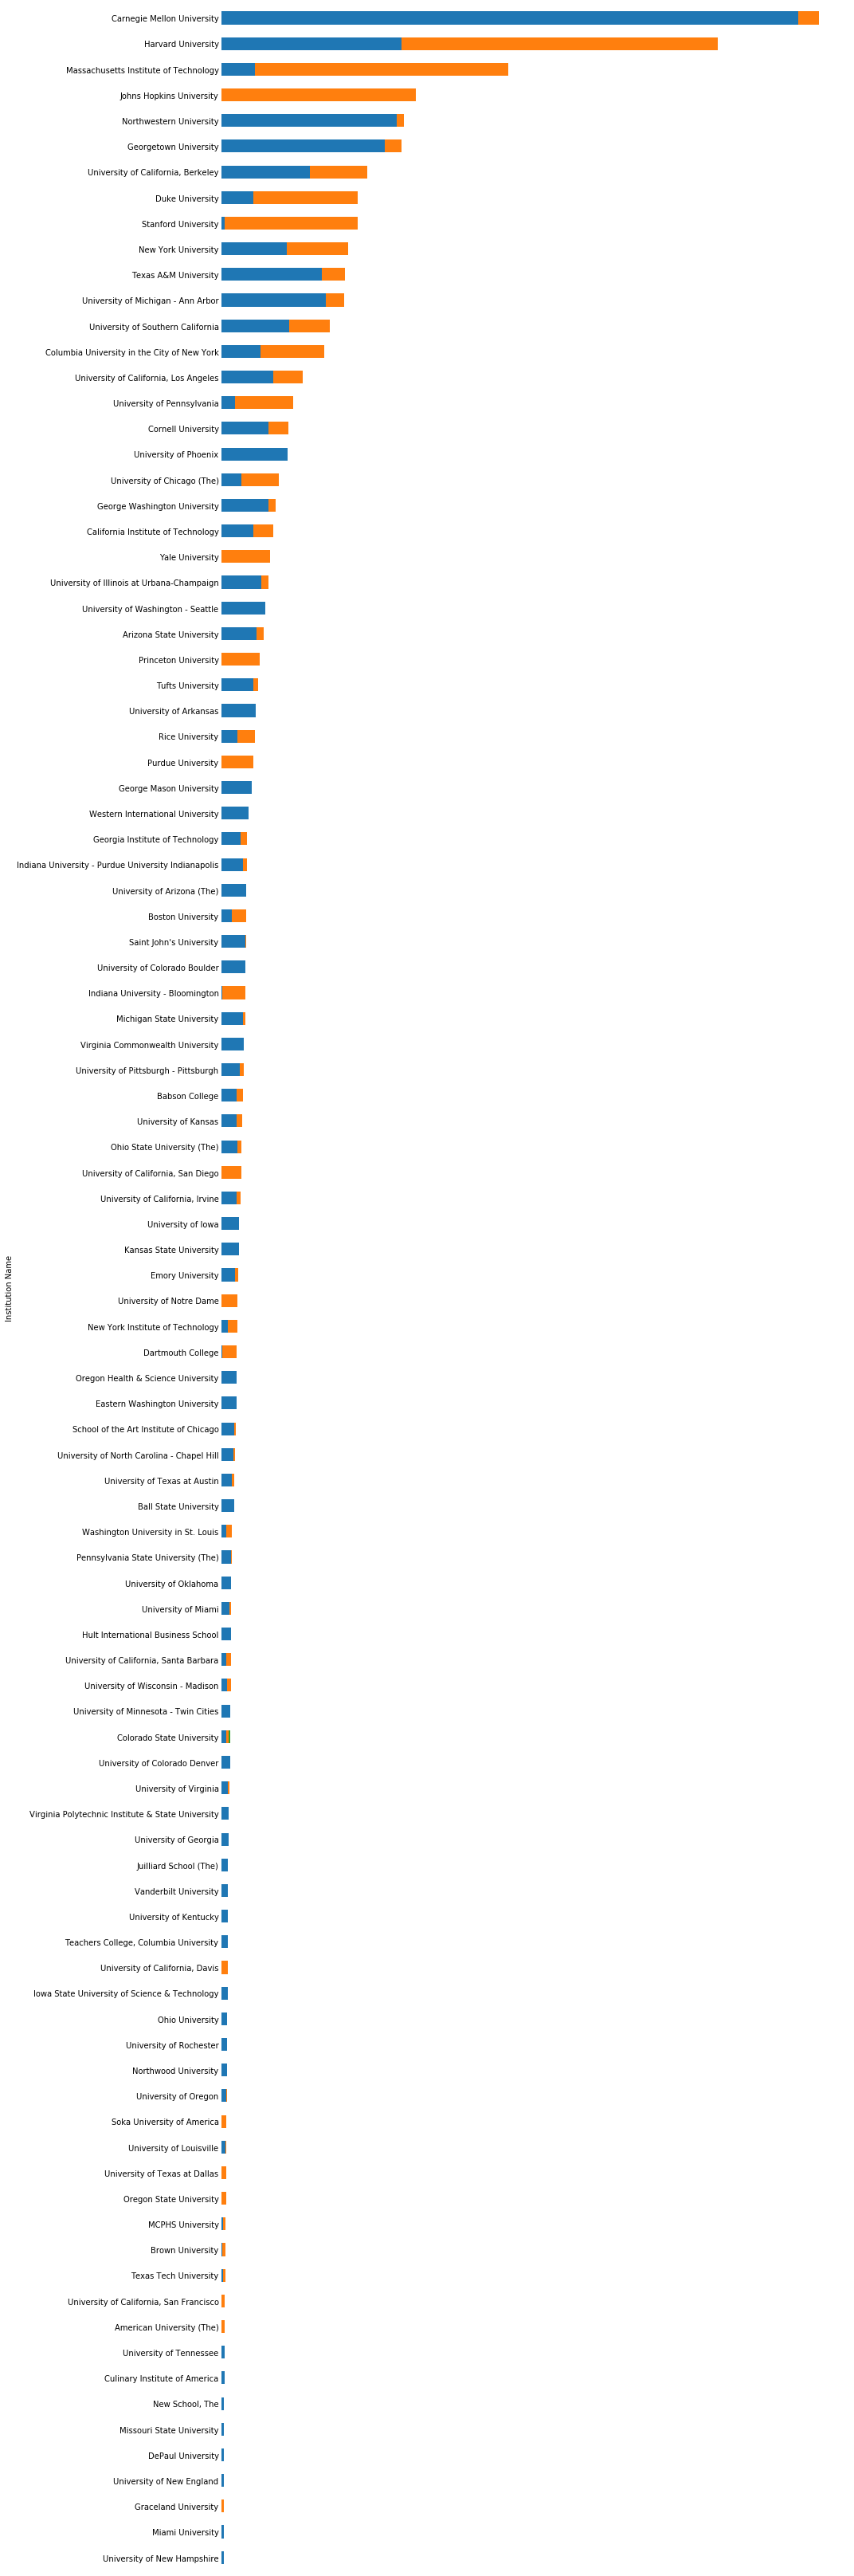

In [428]:
df2.sort_values(by='total',ascending = False).head(100).sort_values(by='total').plot(x='Institution Name',
                                                y =['contract','monetary_gift','real_estate'] ,
                                                kind= 'barh',
                                                figsize=(15,45),
                                                legend = None,
                                                stacked= True
                                                )

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
ax1.tick_params(axis=u'both', which=u'both',length=0)
x_axis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('universitygift.pdf')

In [399]:
contract2 = df[df['Gift Type'] == 'Contract'].groupby(by='Country of Giftor', as_index = False).sum()
contract2 = contract2.drop(columns=['ID', 'OPEID'])
monetary_gift2 = df[df['Gift Type'] == 'Monetary Gift'].groupby(by='Country of Giftor', as_index = False).sum()
monetary_gift2 = monetary_gift2.drop(columns=['ID', 'OPEID'])
real_estate2 = df[df['Gift Type'] == 'Real Estate'].groupby(by='Country of Giftor', as_index = False).sum()
real_estate2 = real_estate2.drop(columns=['ID', 'OPEID'])


In [401]:
df3 = pd.merge(contract2, monetary_gift2, on='Country of Giftor', how='outer')
df3 = pd.merge(df3, real_estate2, on='Country of Giftor', how='outer')
df3 = df3.fillna(0)

In [403]:
df3.rename(columns={'Foreign Gift Amount_x':'contract',
                    'Foreign Gift Amount_y':'monetary_gift',
                  'Foreign Gift Amount': 'real_estate' }, inplace=True)

In [404]:
df3['total'] = df3['contract'] + df3['monetary_gift'] + df3['real_estate']

In [405]:
df3

,Country of Giftor,contract,monetary_gift,real_estate,total
0,AFGHANISTAN,5.001410e+06,3890364.0,0.0,8.891774e+06
1,ANGOLA,4.999080e+05,0.0,0.0,4.999080e+05
2,ARGENTINA,1.490733e+06,3965425.0,0.0,5.456158e+06
3,AUSTRALIA,3.726880e+07,24187528.0,0.0,6.145633e+07
4,AUSTRIA,1.555320e+07,3772945.0,0.0,1.932614e+07
5,BAHAMAS,2.475445e+07,28282017.0,0.0,5.303647e+07
6,BAHRAIN,3.161970e+06,1000000.0,0.0,4.161970e+06
7,BANGLADESH,3.237250e+06,4712443.0,0.0,7.949693e+06
8,BELGIUM,2.598285e+07,24879544.0,0.0,5.086240e+07
9,BERMUDA,7.555342e+08,56891877.0,0.0,8.124261e+08


In [406]:
df3.to_csv('countrygift.csv', index = False)

In [412]:
df[df['Country of Giftor'] == 'ENGLAND'].groupby(by= 'Institution Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Institution Name,,,
Harvard University,11695,6034000,217005636
Massachusetts Institute of Technology,238285,6098400,65960984
"University of California, Los Angeles",13765281,117298000,51186060
Johns Hopkins University,199291,9138800,49652346
University of Michigan - Ann Arbor,782235,18832500,44877923
University of Pennsylvania,211024,11147400,42438420
Princeton University,1558676,36252600,36840555
Columbia University in the City of New York,869008,29777000,30871338
University of Chicago (The),518235,6563800,29450392


In [417]:
df[df['Country of Giftor'] == 'ENGLAND'].groupby(by= 'Giftor Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Giftor Name,,,
STL PTC UK Limited,38148,871200,28000000
Anonymous,165599,6149200,25307259
Princeton Charitable Fnd. Ltd.,1147314,26532700,22603574
University of Pennsylvania USA,4563,2026800,14163246
SAMUEL TAK LEE CHAR TRUST,100,217800,13000000
Samuel Tak Lee Char Trust,38209,871200,12000000
Arcadia Trust,116775,920500,11918168
Charities Aid Foundation,145364,5540500,11748543
"Respivert, LTD",2017,639000,11728943


In [414]:
df[df['Country of Giftor'] == 'BERMUDA'].groupby(by= 'Institution Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Institution Name,,,
Carnegie Mellon University,57215,3242000,750000000
Rice University,70354,2522800,37300000
"University of California, Berkeley",42645,393600,5000000
Harvard University,46122,1508500,4477000
Massachusetts Institute of Technology,28529,653400,4000000
George Washington University,16528,577600,3311666
Columbia University in the City of New York,19193,812100,1550000
Indiana University - Purdue University Indianapolis,34154,906500,1496248
New York University,38590,1114000,1225000


,ID,OPEID,Foreign Gift Amount
Giftor Name,,,
Anonymous,97257,3276400,38025000
Tang Family Foundation,26862,672600,3050000
The Atlantic Philanthropies,15140,433200,2155966
Axovant Sciences,453953,10176500,1769374
Tang Family,14196,131200,1500000
Tang Family Foundation,14218,131200,1500000
THE ATLANTIC PHILANTHROPIES,1388,144400,1155700
"SIMONS FOUNDATION INTERNATIONAL, LT",9474,217800,1000000
Hemera Foundation,20586,374500,900000


In [415]:
df[df['Country of Giftor'] == 'CHINA'].groupby(by= 'Institution Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Institution Name,,,
Harvard University,86588,6465000,79272834
University of Southern California,594088,4780800,64842308
Stanford University,1487596,16182000,57826822
New York University,225196,9469000,47921981
University of Illinois at Urbana-Champaign,175538,3727500,33531022
University of Pennsylvania,433998,17227800,32919192
Massachusetts Institute of Technology,177595,4791600,31472548
Arizona State University,173860,4864500,31332013
University of Michigan - Ann Arbor,1181078,17902500,23988361


In [419]:
df[df['Country of Giftor'] == 'CHINA'].groupby(by= 'Giftor Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Giftor Name,,,
Anonymous,200646,5546700,39847051
Zhejiang University,10213,887500,27210615
Corporation,65073,531200,12548483
Shanghai National Accounting Instit,20501,648600,11513556
Tianjin Juilliard JV Institutes,164,274200,9128905
Sino-American Corporation,1191,357200,8890964
E-House (China) Holdings Limited,7518,1689000,6286433
"Frontt Capital Management, Ltd",4256,465000,6127032
Sino-American Cooperation on HE,1603,357200,5561797


In [416]:
df[df['Country of Giftor'] == 'SAUDI ARABIA'].groupby(by= 'Institution Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Institution Name,,,
Massachusetts Institute of Technology,93071,2831400,83100000
George Washington University,25764,2310400,75181430
George Mason University,4207,4498800,58926776
Tufts University,51112,3328500,37896715
Johns Hopkins University,192511,6023300,32618021
Harvard University,55720,3232500,30637202
University of Kansas,295066,7207600,29898072
University of Southern California,160579,2124800,25343601
"University of California, Berkeley",122102,1705600,24143617


In [422]:
df[df['Country of Giftor'] == 'SAUDI ARABIA'].groupby(by= 'Giftor Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

,ID,OPEID,Foreign Gift Amount
Giftor Name,,,
Saudi Arabian Cultural Mission,1943961,52343300,110485522
Royal Embassy of Saudi Arabia,5394,4934600,74720333
Government of Saudi Arabia,4098,1444000,57742526
Mr. Mohammed A. Jameel,18,217800,43000000
"Jameel. Mohammed, Abdul",9631,435600,30000000
King Abdulaziz City for Science and,26613,568300,17454861
Royal Embassy Saudi Cultural Missio,4831,1669200,13868962
KING ABDULAZIZ CITY FOR SCIENCE AND,119,131500,11071016
Kingdom of Saudia Arabia,152,379800,9725738


,Institution Name,ID,OPEID,Foreign Gift Amount
1,Carnegie Mellon University,61434,7132400,376325840
5,Georgetown University,50341,3468000,350874324
11,Northwestern University,495681,9738400,340244432
16,Texas A&M University,1328192,57385600,274710107
2,Cornell University,359498,20332500,65780453


/Users/humeralodhi/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


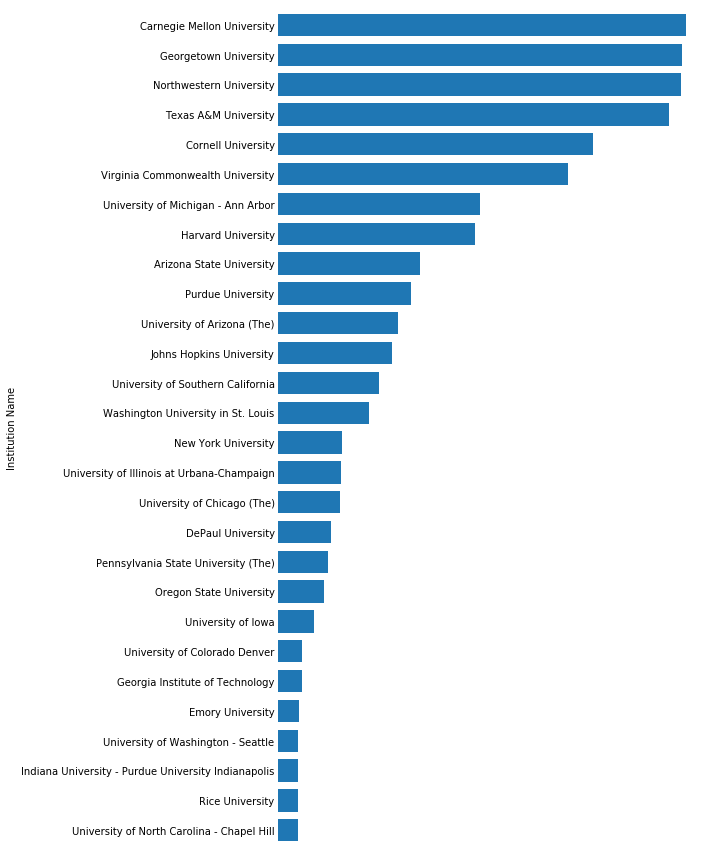

Index(['Institution Name', 'ID', 'OPEID', 'Foreign Gift Amount'], dtype='object')

(28, 4)

,Institution Name,ID,OPEID,Foreign Gift Amount
1,Carnegie Mellon University,61434,7132400,376325840
5,Georgetown University,50341,3468000,350874324
11,Northwestern University,495681,9738400,340244432
16,Texas A&M University,1328192,57385600,274710107
2,Cornell University,359498,20332500,65780453
26,Virginia Commonwealth University,76978,2614500,40668808
22,University of Michigan - Ann Arbor,204259,3022500,7860694
7,Harvard University,27794,1293000,7077754
0,Arizona State University,410604,4324000,2515184
14,Purdue University,55358,1277500,2112466


,ID,OPEID,Foreign Gift Amount
Country of Giftor,,,
QATAR,3315093,118552000,1478676069
ENGLAND,31589478,552868700,936468499
BERMUDA,926520,23718000,812426114
CHINA,18092303,315381600,680273016
SAUDI ARABIA,6245636,141787300,649971586
HONG KONG,10044775,153988300,583104614
CANADA,23516436,377770600,511016461
JAPAN,20199569,337935500,447932424
INDIA,2366358,121098700,428598388


,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,Carnegie Mellon University,Pittsburgh,PA,2015-01-01,77391377,Contract,QATAR,Qatar Foundation for Education
1,American University (The),Washington,DC,2012-01-25,500000,Monetary Gift,BAHRAIN,Kingdom of Bahrain
2,American University (The),Washington,DC,2013-05-28,500000,Monetary Gift,BAHRAIN,Sheikh Salman Bin Al-Khalifa
3,American University (The),Washington,DC,2015-09-10,500000,Monetary Gift,KUWAIT,NaN
4,American University (The),Washington,DC,2012-05-17,610000,Monetary Gift,ENGLAND,NaN
5,American University (The),Washington,DC,2014-04-24,1000000,Monetary Gift,ENGLAND,Anonymous
6,American University (The),Washington,DC,2015-04-13,1000000,Monetary Gift,ENGLAND,NaN
7,Amherst College,Amherst,MA,2018-04-05,500000,Monetary Gift,MONACO,Prince Albert II
8,Arizona State University,Tempe,AZ,2013-03-22,23,Contract,FRANCE,Center Hospitalier Univers. Vaudois
9,Arizona State University,Tempe,AZ,2018-03-28,130,Contract,VIETNAM,"Intel Products Vietnam Co., Ltd."


,ID,OPEID,Foreign Gift Amount
Country of Giftor,,,
QATAR,3315093,118552000,1478676069
ENGLAND,31589478,552868700,936468499
BERMUDA,926520,23718000,812426114
CHINA,18092303,315381600,680273016
SAUDI ARABIA,6245636,141787300,649971586


,Foreign Gift Amount
Country of Giftor,
QATAR,1478676069
ENGLAND,936468499
BERMUDA,812426114
CHINA,680273016
SAUDI ARABIA,649971586
HONG KONG,583104614
CANADA,511016461
JAPAN,447932424
INDIA,428598388


,ID,OPEID,Foreign Gift Amount
Country of Giftor,,,
QATAR,3315093,118552000,1478676069
ENGLAND,31589478,552868700,936468499
BERMUDA,926520,23718000,812426114
CHINA,18092303,315381600,680273016
SAUDI ARABIA,6245636,141787300,649971586
